In [ ]:
import pandas as pd

# We load the JKP factor dataset and ensure the 'date' column is parsed correctly
jkp = pd.read_csv('data/jkp_factors.csv', parse_dates=['date'])

# We preview the first few entries to validate loading and structure
print(jkp.head())

# We report dataset dimensions and coverage for an initial assessment
print("\nTotal rows:", len(jkp))
print("Unique factors:", jkp['name'].nunique())
print("Date range:", jkp['date'].min(), "to", jkp['date'].max())


  location name     freq weighting  direction  n_stocks  n_stocks_min  \
0      usa  age  monthly    vw_cap         -1       502             8   
1      usa  age  monthly    vw_cap         -1       505            12   
2      usa  age  monthly    vw_cap         -1       510            17   
3      usa  age  monthly    vw_cap         -1       512            21   
4      usa  age  monthly    vw_cap         -1       503            23   

        date       ret  
0 1926-03-31 -0.086738  
1 1926-04-30 -0.000572  
2 1926-05-31 -0.006332  
3 1926-06-30 -0.003012  
4 1926-07-31  0.003211  

Total rows: 144620
Unique factors: 153
Date range: 1926-01-31 00:00:00 to 2024-12-31 00:00:00


In [ ]:
# 2.a) We inspect the proportion of missing values for each column to assess data quality
print("Missing % by column:")
print(jkp.isna().mean() * 100)

# 2.b) We compute distribution statistics for returns, grouped by factor name
dist_stats = jkp.groupby('name')['ret'].describe()
print("\nReturn distribution by factor:")
print(dist_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])


Missing % by column:
location        0.0
name            0.0
freq            0.0
weighting       0.0
direction       0.0
n_stocks        0.0
n_stocks_min    0.0
date            0.0
ret             0.0
dtype: float64

Return distribution by factor:
                    count      mean       std       min       25%       50%  \
name                                                                          
age                1186.0 -0.001053  0.030847 -0.234123 -0.011601  0.000285   
aliq_at             878.0  0.001113  0.033212 -0.222644 -0.014723  0.000928   
aliq_mat            878.0 -0.003001  0.024438 -0.136387 -0.015328 -0.002456   
ami_126d           1185.0  0.001302  0.031958 -0.116827 -0.013735 -0.000161   
at_be               890.0 -0.001079  0.028652 -0.199367 -0.012762 -0.000650   
...                   ...       ...       ...       ...       ...       ...   
turnover_var_126d  1185.0  0.000510  0.022923 -0.191118 -0.009539  0.000069   
z_score             752.0  0.000366  0.03

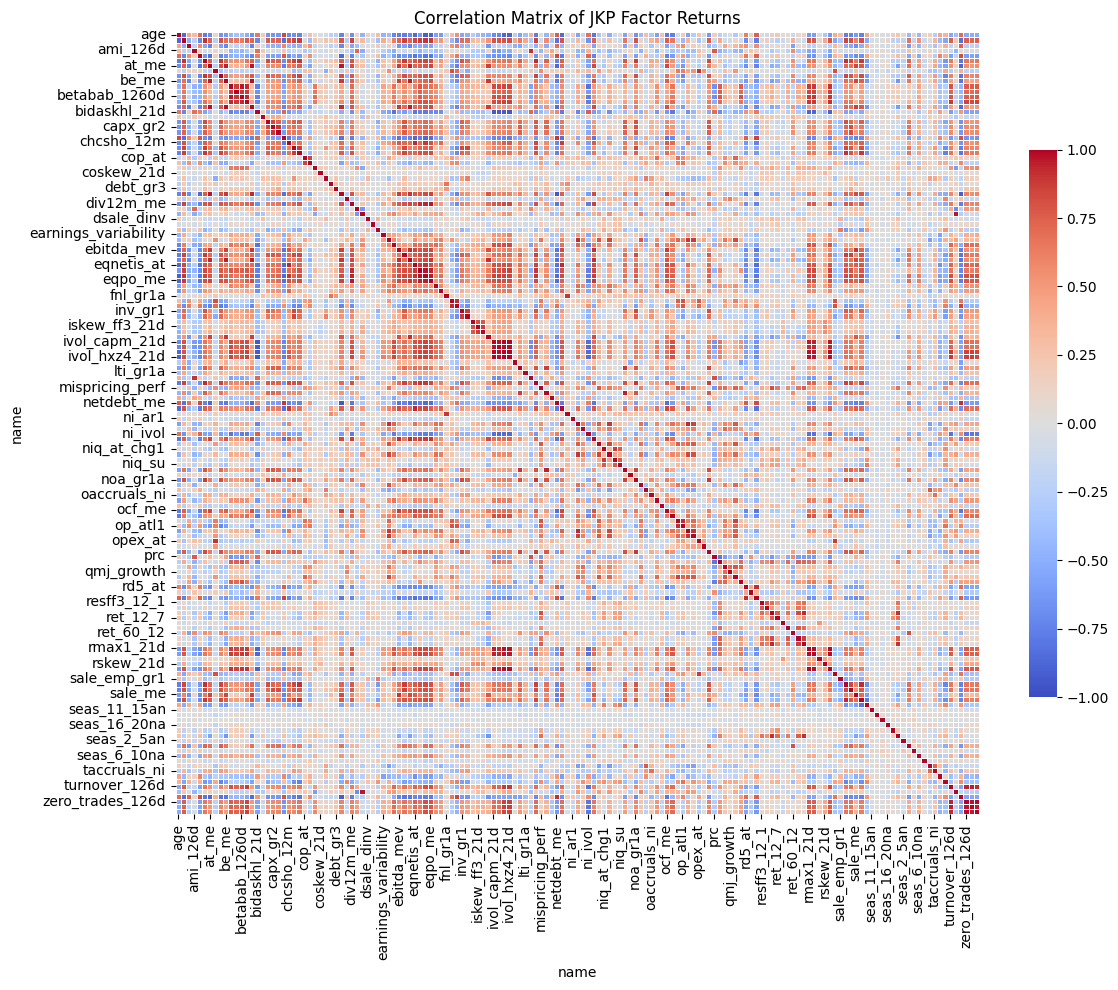

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# We reshape the dataset so that each factor becomes a column and each row corresponds to a date
jkp_wide = jkp.pivot(index='date', columns='name', values='ret')

# We compute pairwise correlations across all factor return time series
corr = jkp_wide.corr()

# We visualize the resulting correlation matrix as a heatmap to highlight clusters or redundancies
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap='coolwarm',
            linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title('Correlation Matrix of JKP Factor Returns')
plt.tight_layout()
plt.show()
